In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [2]:
emp_data_df_obj = pd.read_csv('../../Data/normal_employee_data.csv')

In [31]:
emp_data_df_obj['Designation'].value_counts()

Sr.Analyst    9
Manager       6
Analyst       6
Sr.Dev        4
Sr.Manager    3
Jr.Dev        2
Director      2
Name: Designation, dtype: int64

In [3]:
emp_data_df_obj.head()

,Emp #,Designation,Experience,Salary,AggrBehavScore,ActivityScore,LinesOfCode
0,e1,Director,15.0,85000,0.33,2,1332
1,e2,Jr.Dev,3.0,25000,5.67,16,6666
2,e3,Sr.Dev,6.0,36000,2.33,7,3332
3,e4,Jr.Dev,2.0,20000,9.00,24,9999
4,e5,Sr.Dev,5.0,37000,3.00,9,3999


In [4]:
salary_data = emp_data_df_obj[['Experience','LinesOfCode','Salary']].copy()

In [5]:
salary_data.head()

,Experience,LinesOfCode,Salary
0,15.0,1332,85000
1,3.0,6666,25000
2,6.0,3332,36000
3,2.0,9999,20000
4,5.0,3999,37000


In [6]:
salary_data.describe()

,Experience,LinesOfCode,Salary
count,32.000000,32.000000,32.000000
mean,9.059375,2654.843750,54735.781250
std,3.157261,1675.495018,17139.771777
min,2.000000,1175.000000,20000.000000
25%,7.500000,1946.000000,42525.000000
50%,9.100000,2201.000000,53183.000000
75%,10.275000,2666.000000,67235.750000
max,17.000000,9999.000000,89500.000000


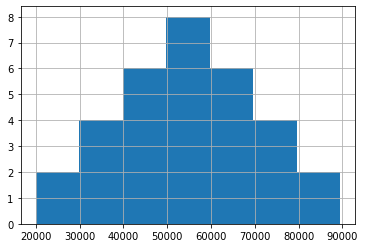

In [7]:
salary_data['Salary'].hist(bins=7)

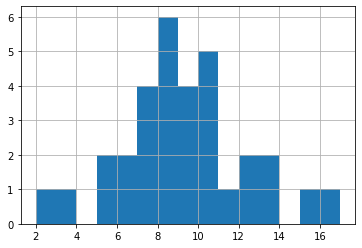

In [8]:
salary_data['Experience'].hist(bins=15)

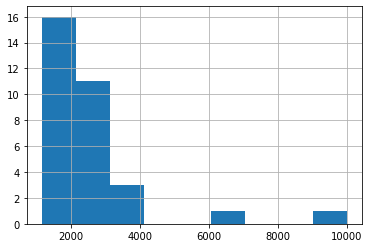

In [9]:
salary_data['LinesOfCode'].hist(bins=9)

In [10]:
salary_data[['Experience', 'Salary']].head()

,Experience,Salary
0,15.0,85000
1,3.0,25000
2,6.0,36000
3,2.0,20000
4,5.0,37000


In [11]:
linear_model = smf.ols(formula='Salary ~ Experience', data=salary_data).fit()

In [12]:
test_salary_data = pd.DataFrame({'Experience':[12.2, 13.7],
                                'Salay':[np.nan, np.nan]})

In [13]:
test_salary_data

,Experience,Salay
0,12.2,NaN
1,13.7,NaN


In [14]:
linear_model.predict(test_salary_data['Experience'])

0    70978.609184
1    78736.377750
dtype: float64

In [15]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     294.7
Date:                Thu, 30 Jan 2020   Prob (F-statistic):           4.61e-17
Time:                        12:16:51   Log-Likelihood:                -318.76
No. Observations:                  32   AIC:                             641.5
Df Residuals:                      30   BIC:                             644.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7882.0915   2885.271      2.732      0.010    1989.583    1.38e+04
Experience  5171.8457    301.254     17.168      0.000    4556.603    5787.089
==============================================================================
Omnibus:                        3.186   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                1.441
Skew:                           0.016   Prob(JB):                        0.487
Kurtosis:                       1.961   Cond. No.                         29.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
range(10000, 100000, 10000)

range(10000, 100000, 10000)

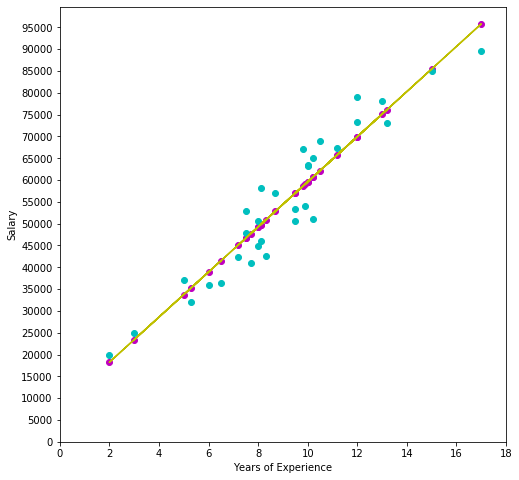

In [17]:
#intercept = linear_model.params[0]
#slope = linear_model.params[1]
fig = plt.figure(figsize=(8,8))
salary_predicted = linear_model.predict(salary_data.Experience)
plt.scatter(salary_data.Experience, salary_predicted, color='m')
plt.scatter(salary_data.Experience, salary_data.Salary, color='c')
plt.plot(salary_data.Experience, salary_predicted, color='y')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

xticks2 = plt.xticks(np.arange(0,20, 2))
yticks2 = plt.yticks(np.arange(0,100000,  5000))

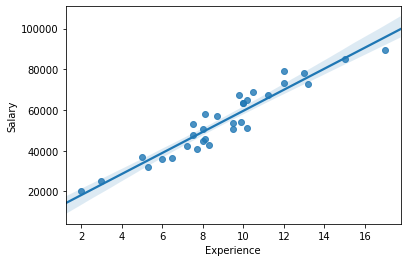

In [18]:
sns.regplot(x='Experience', y='Salary', data=salary_data)

In [20]:
np_predicted_sal = linear_model.predict(salary_data['Experience']).values

In [21]:
salary_data['predicted_sal'] = np_predicted_sal

In [22]:
salary_data.head()

,Experience,LinesOfCode,Salary,predicted_sal
0,15.0,1332,85000,85459.777174
1,3.0,6666,25000,23397.628648
2,6.0,3332,36000,38913.165780
3,2.0,9999,20000,18225.782938
4,5.0,3999,37000,33741.320069


In [23]:
salary_data['residual'] = salary_data['Salary'] - salary_data['predicted_sal']

In [24]:
salary_data['squared_error'] = salary_data['residual']**2

In [25]:
salary_data.head()

,Experience,LinesOfCode,Salary,predicted_sal,residual,squared_error
0,15.0,1332,85000,85459.777174,-459.777174,2.113950e+05
1,3.0,6666,25000,23397.628648,1602.371352,2.567594e+06
2,6.0,3332,36000,38913.165780,-2913.165780,8.486535e+06
3,2.0,9999,20000,18225.782938,1774.217062,3.147846e+06
4,5.0,3999,37000,33741.320069,3258.679931,1.061899e+07


### Multiple Linear Regression

In [26]:
salary_data.columns

Index(['Experience', 'LinesOfCode', 'Salary', 'predicted_sal', 'residual',
       'squared_error'],
      dtype='object')

In [27]:
linear_model1 = smf.ols(formula='Salary ~ Experience + LinesOfCode', data=salary_data).fit()

In [28]:
test_salary_data1 = pd.DataFrame({'Experience':[12.2, 13.7],
                                  'LinesOfCode': [2200, 1930],
                                'Salay':[np.nan, np.nan]})

In [29]:
linear_model1.predict(test_salary_data1)

0    71245.296553
1    79114.184003
dtype: float64

In [30]:
linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     143.0
Date:                Thu, 30 Jan 2020   Prob (F-statistic):           9.51e-16
Time:                        12:58:57   Log-Likelihood:                -318.70
No. Observations:                  32   AIC:                             643.4
Df Residuals:                      29   BIC:                             647.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5890.7324   6772.174      0.870      0.392   -7959.918    1.97e+04
Experience   5301.3777    501.283     10.576      0.000    4276.139    6326.617
LinesOfCode     0.3081      0.945      0.326      0.747      -1.624       2.240
==============================================================================
Omnibus:                        2.902   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                1.387
Skew:                           0.051   Prob(JB):                        0.500
Kurtosis:                       1.985   Cond. No.                     2.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""